## An Exploration of the Bike Share Kaggle Dataset

In this document, I will show you how to do some basic exploration and cleaning of the kaggle Bike share dataset.  The data is checked into the repository under `DataScience16/datasets/kaggle_bikeshare_train.csv`.  The code here relies on you running this notebook from the `DataScience16/exercises` directory.

First, we will read the data into a Pandas dataframe.  The NSFG class from ThinkStats reading is really just a thin wrapper around `pandas.read_csv`.

In [1]:
import pandas as pd

data = pd.read_csv('../../datasets/kaggle_bikeshare_train.csv')

print data.head()
print data.describe()

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81          0       3          13     16  
1        80          0       8          32     40  
2        80          0       5          27     32  
3        75          0       3          10     13  
4        75          0       0           1      1  
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427  

### Checking for Missing values

When you first work with a dataset, it's always a good idea to check for missing values.  To do this we will use the pandas isnull() function.  Keep in mind that this is just one method of determining whether or not data is missing.  It will only tell part of the story.  What are some other ways of figuring out if there are missing values?

In [2]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Validating our Recodes

The next thing to do is to make sure we understand some of recodes in the data.  We know that we are trying to predict count which is presumably a combination of casual and registered.  Let's check this hypothesis.  Note: this is more about checking our own understanding rather than checking to validity of the data (since we can be reasonably confident that it is correct).  However, you could imagine this would be a good unit test for recodes that you created yourself.  In fact, this unit test would serve as a guide for anyone else reading your code as to what exactly the recode means.

In [6]:
print data.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')


You may have noticed we used the dictionary notation to lookup `count` whereas we used the dot-notation to lookup registered and casual.  The reason for this is that is a method of the DataFrame class, and thus it is ambiguous which we are referring to (the column or the method).  Let's learn more about this by printing out the type of `data.registered`, `data['registered']`, `data['count']`, and `data.count`.

In [13]:
print sum(data.casual + data.registered - data['count'])

0


### Exploring Basic Properties of the Data

Next, we will look at each of the variables in some more detail.

In [14]:
pd.options.display.max_rows = 100
print data.casual.value_counts().sort_index()
print data.registered.value_counts().sort_index()

0      986
1      667
2      487
3      438
4      354
5      332
6      269
7      250
8      250
9      230
10     213
11     193
12     190
13     146
14     137
15     146
16     141
17     134
18     128
19     141
20     120
21     116
22     104
23      87
24      95
25     103
26      91
27     124
28     105
29      99
30      87
31     105
32      64
33     100
34      70
35      67
36      78
37      61
38      65
39      69
40      76
41      56
42      71
43      47
44      60
45      47
46      47
47      51
48      59
49      54
      ... 
263      1
264      1
265      1
266      2
267      2
268      2
269      3
272      1
274      1
275      2
276      2
279      3
280      1
282      1
283      1
284      1
286      3
287      2
288      1
289      1
291      1
292      1
293      2
294      1
295      3
297      1
298      1
299      1
304      1
308      1
310      1
311      1
312      1
317      1
320      1
321      1
325      1
326      1
327      1
331      1

That's pretty hard to get much out of.  Let's see if we can do better by merging the two series together into a dataframe.

In [17]:
pd.concat([data.casual.value_counts(), data.registered.value_counts()], axis=1)

,casual,registered
0,986,15
1,667,135
2,487,150
3,438,195
4,354,190
5,332,177
6,269,155
7,250,126
8,250,114
9,230,114


That's much more revealing!  What sorts of patterns does that reveal?  How does the behavior of the two user populations differ?

They say a picture is worth a thousand words (or a thousand numbers).  Let's create a visual representation of the counts above.  This is called a histogram.  We will do this using Seaborn, but you will have a chance to learn how to do it using ThinkStats and ThinkPlot in the reading for next time.

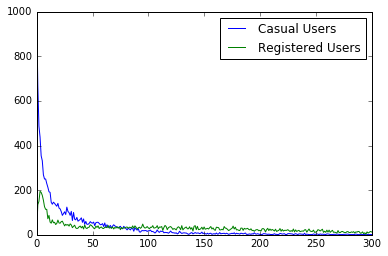

In [29]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(data.casual.value_counts().sort_index())
plt.plot(data.registered.value_counts().sort_index())

plt.xlim([0,300])
plt.legend(['Casual Users', 'Registered Users'])

plt.show()

## Investigating Relationship Between Ridership and Other Factors

We will investigate some different methods for determining how the value of one factor affects the value of another.  As a first example, let's determine the effect of whether or not it is a working day has on the ridership for both casual and registered riders.

TypeError: an integer is required

Next, we'll use the `groupby` operation to do this in an even more convenient fashion.

Another cool use of `groupby` is that you can specify multiple columns to essentially get conjunctions.  Let's test the interaction between the `season` column and the `holiday` columns.

## Recodes

Next, we will parse through the datetime field to create some recodes that will allow us to access various fields datetime.  A typical entry in the datetime columns looks like this: `2011-04-05 13:00:00`.  Next, we will create a function that converts this string into a tuple of integers in the format year, month, day, hour.

Next, we will apply our function to create some new columns in our data frame.

As a final step, we will use our recodes to create some time series plots.

### Go Play!

Explore some interesting facets of the data.  Think carefully about whether the results are best communicated in tabular format, raw text, or graphically.